# Using mplchart with mintalib indicators (experimental)

In [8]:
from mplchart.chart import Chart
from mplchart.helper import get_prices

from mplchart.primitives import Candlesticks, Volume, TradeMarker, Peaks, SameAxes

from mintalib.indicators import SMA, EMA, RSI, ATR, PSAR, ROC, SLOPE, MACD, PPO, BOP

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')


In [9]:
ticker = 'AAPL'
freq = 'daily'
prices = get_prices(ticker, freq=freq)
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600
...,...,...,...,...,...
2022-08-15,171.520004,173.389999,171.350006,173.190002,54091700
2022-08-16,172.779999,173.710007,171.660004,173.029999,56377100
2022-08-17,172.770004,176.149994,172.570007,174.550003,79542000


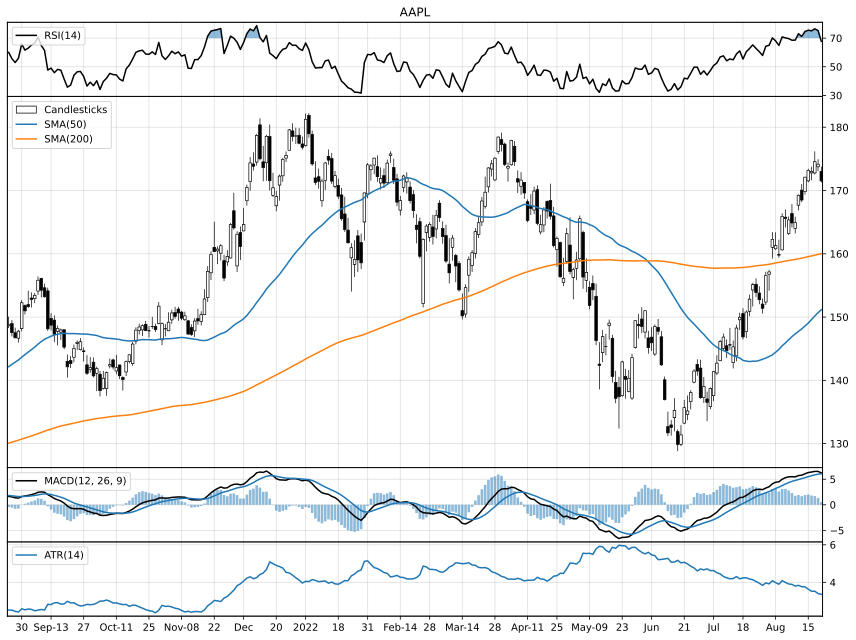

In [10]:
max_bars = 250

indicators = [
    Candlesticks(), SMA(50), SMA(200),
    RSI(),
    MACD(),
    ATR(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


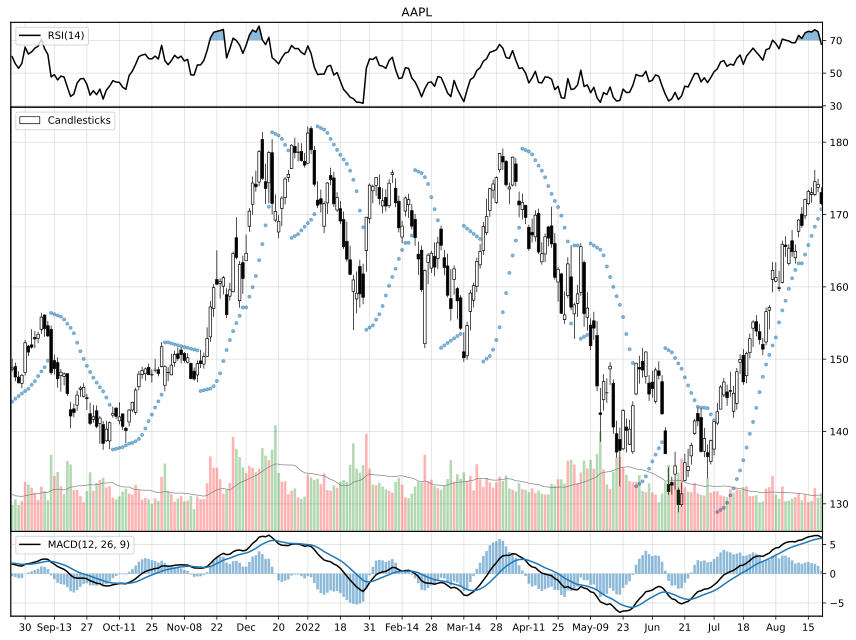

In [11]:
indicators = [
    Candlesticks(use_bars=False), PSAR(),
    Volume(), RSI(), MACD(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


CPU times: total: 766 ms
Wall time: 777 ms


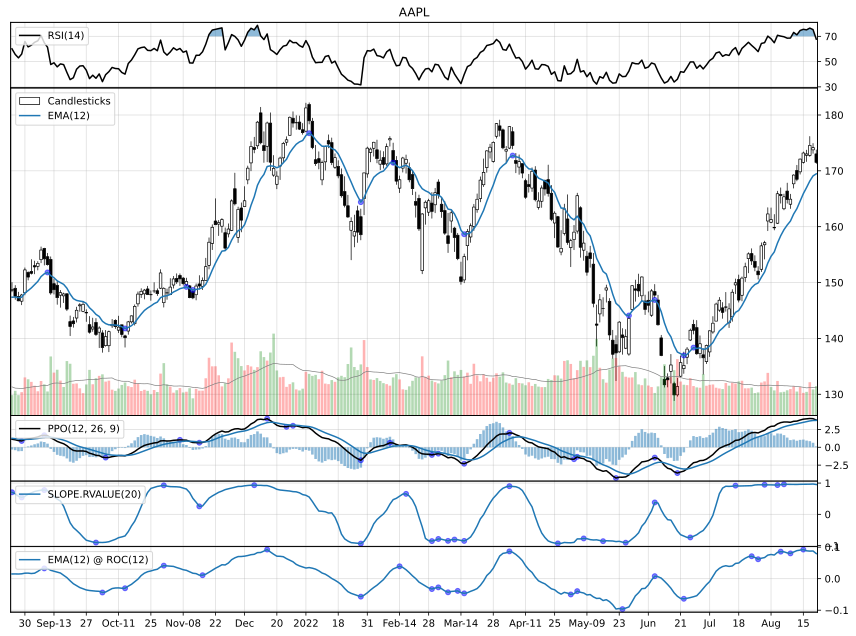

In [12]:
%%time

# testing indicator composition
indicators = [Candlesticks() , EMA(12), Peaks(4), Volume(),
              RSI(),
              PPO(), Peaks(3, item='ppo'),
              SLOPE.RVALUE(20), Peaks(3),
              EMA(12) @ ROC(12), Peaks(3),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


CPU times: total: 688 ms
Wall time: 688 ms


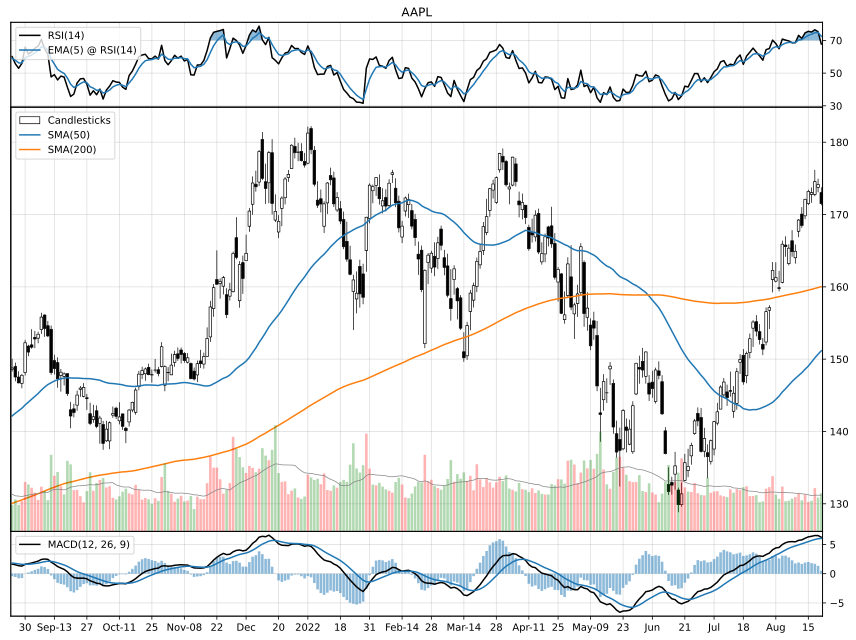

In [13]:
%%time

indicators = [Candlesticks() , SMA(50), SMA(200), Volume(),
              RSI(), SameAxes(), EMA(5) @ RSI(),
              MACD(),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)


CPU times: total: 344 ms
Wall time: 335 ms


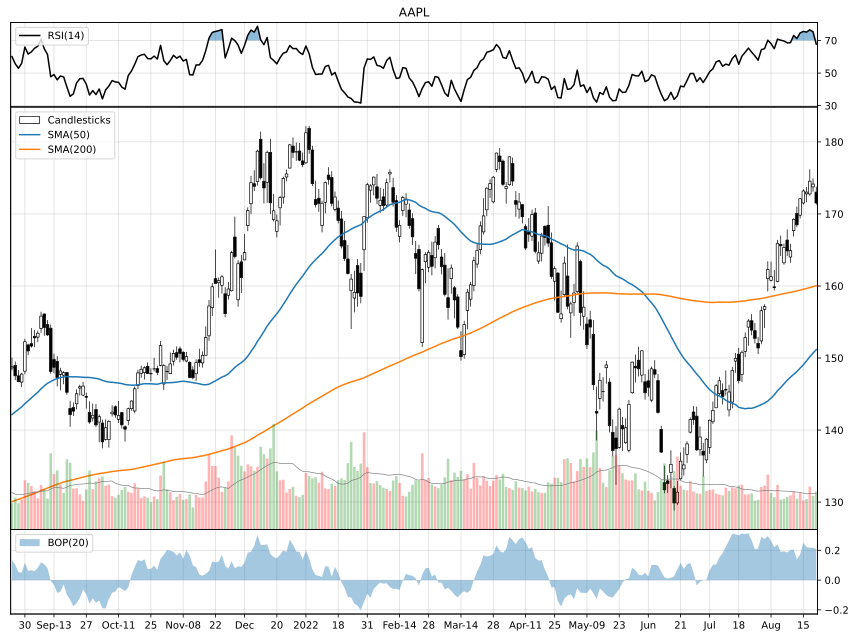

In [14]:
%%time

indicators = [Candlesticks() , SMA(50), SMA(200), Volume(),
              RSI(),
              BOP(),
              ]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
